# INTRODUCTION to TENSORFLOW

## Installing Tensorflow package

## Calling tensorflow package, it will be called by 'tf'

In [2]:
import tensorflow as tf
import numpy as np

## What is the tensorflow? 

- Many people write down about what the tensorflow it is. Please, refer to following Github-blog.

- https://gist.github.com/haje01/202ac276bace4b25dd3f


- The following is offical address of the tensorflow
- https://www.tensorflow.org/api_docs/python/

##  NOTICE
- Moving of tensorflow is quite different in terms of **completing Data Flow Graph first of all!!**
- after you finish buling the Data Flow Graph, **tensor will flow by the help of Session!!** Please, don't be panic.

# Basic works using tf
- TF always demand to proclaim variable first.

####  Let's try prining 'Hellow TensorFlow'
- tf.constant
- tf.Session

In [5]:
# Proclaim the variable containing words, 
hellow = tf.constant("Hello, Tensorflow!")

with tf.Session() as sess:
    print(sess.run(hellow))   

# Character b shown on below window means 'byte string'. It means that there is no problem.

b'Hello, Tensorflow!'


#### adding two nodes
- tf.add

In [21]:
node1 = tf.constant([5,4], dtype=tf.float32)
node2 = tf.constant([4,1], dtype=tf.float32)
node3 = tf.add(node1,node2)

In [32]:
print(node1) # return value is just tensor.
with tf.Session() as sess: 
    print('node1', sess.run(node1))  # return value is node1

Tensor("Const_10:0", shape=(2,), dtype=float32)
node1 [ 5.  4.]


In [27]:
print('There is nothing here in node3', node3)

There is nothing here in node3 Tensor("Add_4:0", shape=(2,), dtype=float32)


In [29]:
with tf.Session() as sess:
    print('But, with "tf.Session()"',sess.run(node3))

But, with "tf.Session()" [ 9.  5.]


In [17]:
node1 = tf.constant([5,4,1,2,3,4,5], dtype=tf.float32)
node2 = tf.constant([4,1,3,2,5,7,1], dtype=tf.float32)
node3 = tf.add(node1,node2)

In [19]:
with tf.Session() as sess:
    print('node3',sess.run(node3))

node3 [  9.   5.   4.   4.   8.  11.   6.]


#### tf.constant can not be changed when the program is running, but tf.placeholders can be changed! It serve as variable
- tf.placeholder
- feed_dict : This is option of tf.Session(). It is through feed_dict that tf.Session() give the placeholders value.
- If variable like weight of neural network could not change, updating variable would be impossible.

In [33]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b

In [34]:
print(adder_node)

Tensor("add:0", dtype=float32)


- proclaiming tf.Session class as sess, then you don't need to write 'with sentence'

In [36]:
sess = tf.Session()

In [37]:
print(sess.run(adder_node, feed_dict={a:3, b:4}))
print(sess.run(adder_node, feed_dict={a:[1,4], b:[2,8]}))

7.0
[  3.  12.]


### Epitomizing TensorFlow Mechanism
- (1)  graph using TensorFlow operations
- (2) Feed data and run graph(operation)
- (3) Update variables in the graph

# Linear Regression

In [42]:
import matplotlib.pyplot as plt

$$Y = 0.7 + 0.5*X + e$$

In [38]:
x = np.array(range(0,100,1),dtype=np.float32)

In [39]:
e = np.random.normal(loc=0,scale=10,size=100)

In [40]:
y = 0.7 + 0.5*x + e

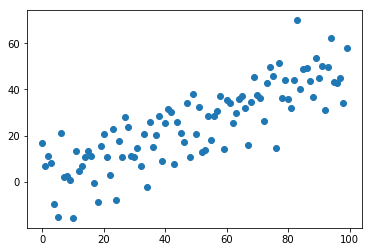

In [43]:
plt.plot(x,y, 'o')
plt.show()

#### Let's find the linear line which minimize cost of function and show proper trend line of the data. 

![Computation graph of LR](http://machinethink.net/images/tensorflow-on-ios/ComputationalGraph.png)

- **Caution**, You should be careful about the size of data and the number of neuron.

In [160]:
x=x.reshape(1,100)  # => one feaure and hundred data
y=y.reshape(1,100)

In [187]:
# Container of data.
X = tf.placeholder(tf.float32,shape=[1,100])
Y = tf.placeholder(tf.float32,shape=[1,100])

# We need only one Weight and one Bias, but this should be declared by array. That is why tf.random_normal([1])
W = tf.Variable(initial_value = tf.random_normal([1]), name='weight')
b = tf.Variable(initial_value = tf.random_normal([1]), name='bias')

In [188]:
# Declare Logistic model
# Connect tf's variables
# Broadcasting is basic
model = W*X + b
# Where is the simoid?

In [190]:
num_iters = 100

slope is  [ 0.93336147] ,and intercept is  [-0.03859342]


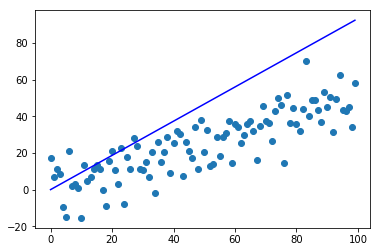

slope is  [ 0.5550521] ,and intercept is  [-0.04427779]


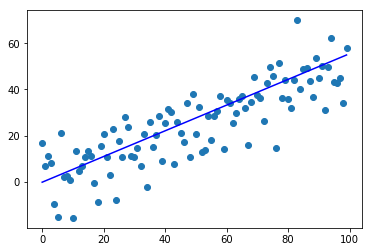

slope is  [ 0.51050502] ,and intercept is  [-0.04493019]


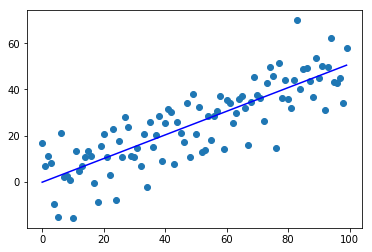

slope is  [ 0.50525922] ,and intercept is  [-0.04499006]


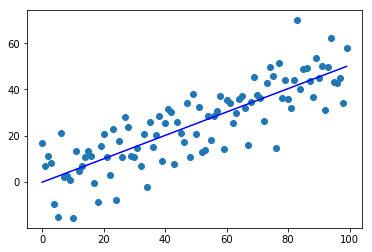

slope is  [ 0.50464123] ,and intercept is  [-0.04498016]


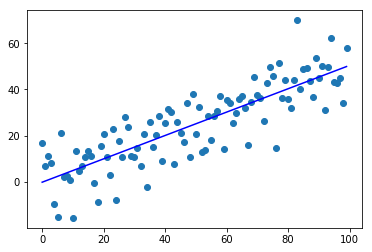

slope is  [ 0.50456822] ,and intercept is  [-0.04496205]


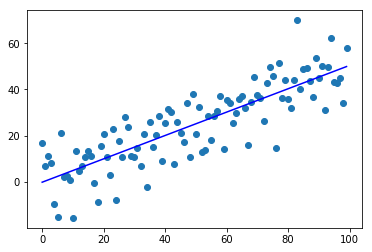

slope is  [ 0.5045594] ,and intercept is  [-0.04494298]


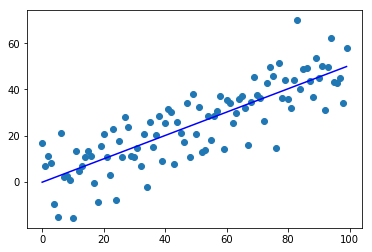

slope is  [ 0.50455809] ,and intercept is  [-0.04492378]


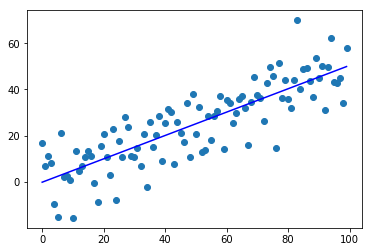

slope is  [ 0.50455767] ,and intercept is  [-0.04490458]


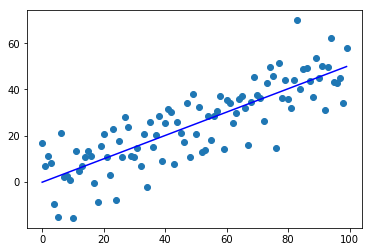

slope is  [ 0.50455737] ,and intercept is  [-0.04488538]


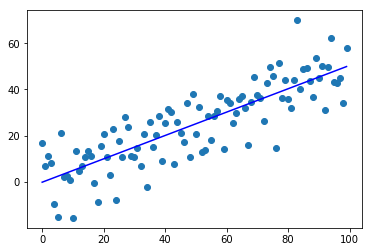

slope is  [ 0.50455707] ,and intercept is  [-0.04486618]


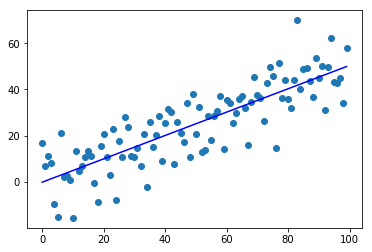

slope is  [ 0.50455678] ,and intercept is  [-0.04484698]


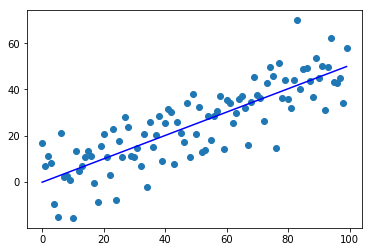

slope is  [ 0.50455648] ,and intercept is  [-0.04482779]


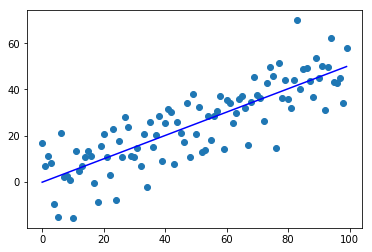

slope is  [ 0.50455624] ,and intercept is  [-0.0448086]


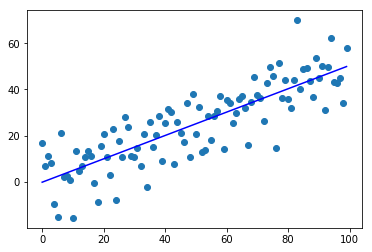

slope is  [ 0.50455594] ,and intercept is  [-0.0447894]


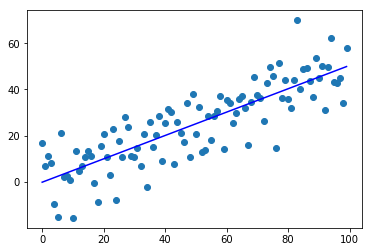

In [189]:
#cost = tf.reduce_mean(loss(Y, model_prob))
cost = tf.reduce_mean(tf.square(Y-model))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001)  # 이거 잘 잡는 게 중요.
Backprop = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())  # W와 b 설정

for step in range(num_iters):
    cost_val, W_val, b_val, _ = sess.run([cost,W, b, Backprop],feed_dict={X:x, Y:y})
    
    if step % 2 ==0:
        new_val = x * W_val + b_val
        print('slope is ',W_val,',and intercept is ', b_val)
        plt.plot(x.reshape(100), y.reshape(100), 'o')
        plt.plot(x.reshape(100), new_val.reshape(100), 'b')
        plt.show()

#### Reduced Mean?